# dual_autodiff Tutorial

In [1]:
# import modules

import dual_autodiff as df
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
# initialise dual number
x = df.Dual(2, 1)
print(f"x.real = {x.real}, x.dual = {x.dual}")

x.real = 2, x.dual = 1


In [4]:
# printing dual number
print(x)

Dual(real=2, dual=1)


In [5]:
# basic arithmetic operations

x = df.Dual(2, 1)
y = df.Dual(3, 2)

print(f"x + y = {x + y}")
print(f"x - y = {x - y}")
print(f"x * y = {x * y}")
print(f"x / y = {x / y}")

x + y = Dual(real=5, dual=3)
x - y = Dual(real=-1, dual=-1)
x * y = Dual(real=6, dual=7)
x / y = Dual(real=0.6666666666666666, dual=-0.25)


In [6]:
# trigonometric operations

print(f"sin(x) = {x.sin()}")
print(f"cos(x) = {x.cos()}")
print(f"tan(x) = {x.tan()}")

sin(x) = Dual(real=0.9092974268256817, dual=-0.4161468365471424)
cos(x) = Dual(real=-0.4161468365471424, dual=-0.9092974268256817)
tan(x) = Dual(real=-2.185039863261519, dual=5.774399204041917)


In [7]:
# the natural logarithm and exponential

print(f"log(x) = {x.log()}")
print(f"exp(x) = {x.exp()}")

log(x) = Dual(real=0.6931471805599453, dual=0.5)
exp(x) = Dual(real=7.38905609893065, dual=7.38905609893065)


In [8]:
# powers

print(f"x**y = {x**y}")

x**y = Dual(real=8, dual=35.090354888959126)


In [9]:
# automatic differentiation

#initialise x = 1.5, with x.dual = 1 to allow for differentiation
x = df.Dual(1.5, 1)

function = x.sin().log() + x**2 * x.cos() #f(x) = log(sin(x)) + x^2 * cos(x)

print(f"log(sin(x)) + x^2 cos(x) = {function.real}")
print(f"d/dx(log(sin(x)) + x^2 cos(x)) = {function.dual}")

log(sin(x)) + x^2 cos(x) = 0.15665054756073515
d/dx(log(sin(x)) + x^2 cos(x)) = -1.9612372705533612


In [11]:
# comparison to analytic and numerical methods:

def f(x):
    return np.log(np.sin(x)) + x**2 * np.cos(x)

def dfdx(x):
    return np.cos(x) / np.sin(x) + 2*x*np.cos(x) - x**2 * np.sin(x)

print(f"analytic df/dx = {dfdx(x=1.5)}")

def central(f, x, h=1e-5):
    return (f(x+h) - f(x-h))/(2*h)

print(f"numerical central df/dx = {central(f, x=1.5)}")

def forward(f, x, h=1e-5):
    return (f(x+h) - f(x))/h

print(f"numerical forward df/dx = {forward(f, x=1.5)}")

def backward(f, x, h=1e-5):
    return (f(x) - f(x-h))/h

print(f"numerical backward df/dx = {backward(f, x=1.5)}")

def fivepoint(f, x, h=1e-5):
    return (-f(x+2*h)+8*f(x+h)-8*f(x-h)+f(x-2*h))/(12*h)

print(f"numerical five-point df/dx = {fivepoint(f, x=1.5)}")

def richardson(D, f, x, h=1e-5):
    return (4*D(f, x, h=h/2) - D(f, x, h))/3

print(f"numerical central Richardson df/dx = {richardson(central, f, x=1.5)}")
print(f"numerical forward Richardson df/dx = {richardson(forward, f, x=1.5)}")
print(f"numerical backward Richardson df/dx = {richardson(backward, f, x=1.5)}")
print(f"numerical five-point Richardson df/dx = {richardson(fivepoint, f, x=1.5)}")

#ADD TABLE HERE

analytic df/dx = -1.9612372705533612
numerical central df/dx = -1.9612372706409584
numerical forward df/dx = -1.9612723090589588
numerical backward df/dx = -1.961202232222958
numerical five-point df/dx = -1.9612372705798962
numerical central Richardson df/dx = -1.9612372705613925
numerical forward Richardson df/dx = -1.961248950033134
numerical backward Richardson df/dx = -1.9612255910896508
numerical five-point Richardson df/dx = -1.9612372705576917


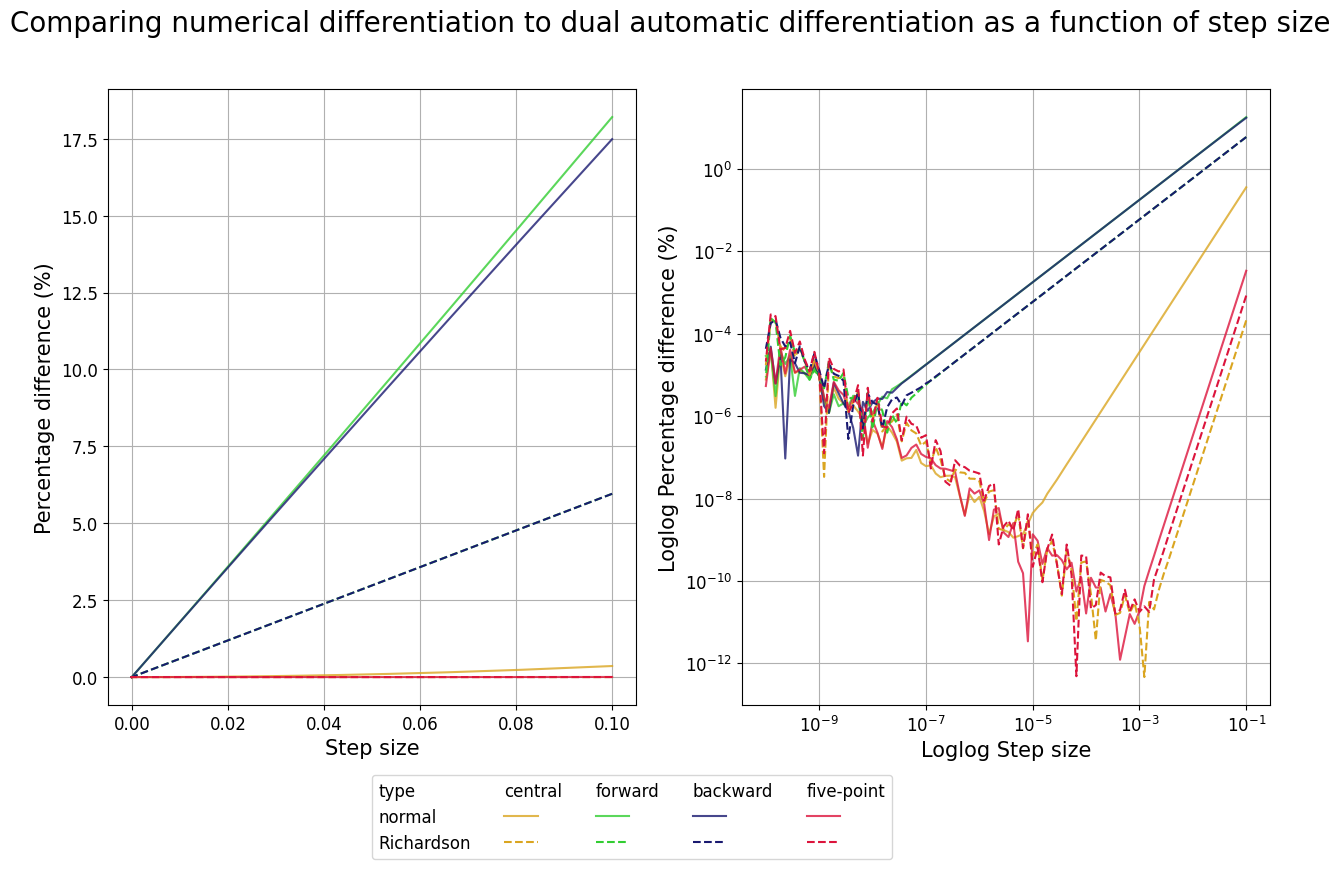

In [39]:
# numerical methods with different step counts:
def numerical_compare():
    N = np.array([10**i for i in np.linspace(1,10,100)])
    steps = 1/N
    x = df.Dual(1.5, 1)
    dual_result = x.sin().log() + x**2 * x.cos()

    functions = np.tile([central, forward, backward, fivepoint], 2)
    names = np.tile(['central', 'forward', 'backward', 'five-point'], 2)
    colours = np.tile(['goldenrod', 'limegreen', 'midnightblue', 'crimson'],2)

    fig, ax = plt.subplots(ncols=2, figsize=(15,8))
    plt.suptitle("Comparing numerical differentiation to dual automatic differentiation as a function of step size", fontsize=20)

    for i in range(len(functions)):
        results = []
        for step in steps:
            if i in range(4):
                result = (functions[i](f, x=1.5, h=step))
            else:
                result = richardson(functions[i], f, x=1.5, h=step)

            results.append((np.abs((dual_result.dual-result)/dual_result.dual))*100)
        
        if i in range(4):
            ax[0].plot(steps, results, label=f"{names[i]} percentage difference", color=colours[i], alpha=0.8)
            ax[1].plot(steps, results, label=f"{names[i]} loglog percentage difference", color=colours[i], alpha=0.8)
        else:
            ax[0].plot(steps, results, label=f"Richardson {names[i]} percentage difference", linestyle="--", color=colours[i])
            ax[1].plot(steps, results, label=f"Richardson {names[i]} loglog percentage difference", linestyle="--", color=colours[i])


        ax[0].set_xlabel("Step size")
        ax[0].set_ylabel("Percentage difference (%)")
        # ax[0].legend()
        ax[0].grid(True)
        
        ax[1].set_xlabel("Loglog Step size")
        ax[1].set_ylabel("Loglog Percentage difference (%)")
        # ax[1].legend()
        ax[1].grid(True)
        ax[1].loglog()
    h, l = ax[0].get_legend_handles_labels()
    extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    lhandle = [extra, extra, extra, extra, h[0], h[4], extra, h[1], h[5], extra, h[2], h[6], extra, h[3], h[7]]
    col1 = ['type', 'normal', 'Richardson']
    col2 = [names[0]]
    col3 = [names[1]]
    col4 = [names[2]]
    col5 = [names[3]]
    empty = [""]
    llabel = np.concatenate([col1, col2, empty*2, col3, empty*2, col4, empty*2, col5, empty*2])

    plt.legend(lhandle, llabel, ncol=5, handletextpad=-2, bbox_to_anchor=(0.3, -0.1))
    plt.show()


numerical_compare()

In [40]:
import dual_autodiff_x as dfx
import time
import memory_profiler as mp
import tracemalloc

In [41]:
def timer(func, *args):
    start = time.time()
    func(*args)
    end = time.time()
    return end - start

In [42]:
def user(func, *args):
    tracemalloc.start()
    func(*args)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak

In [43]:
N = np.arange(10, 10000, 10)

operations = ['add', 'sub', 'mul', 'div', 'pow', 'sin', 'cos', 'tan', 'log', 'exp']

memory = np.zeros((len(N), 2, len(operations)))
for i, n in enumerate(N):
    x = df.Dual(np.random.rand(), np.random.rand())
    memory[i, 0, 0] = user(lambda:[x+x for _ in range(n)])
    memory[i, 0, 1] = user(lambda:[x-x for _ in range(n)])
    memory[i, 0, 2] = user(lambda:[x*x for _ in range(n)])
    memory[i, 0, 3] = user(lambda:[x/x for _ in range(n)])
    memory[i, 0, 4] = user(lambda:[x**x for _ in range(n)])
    memory[i, 0, 5] = user(lambda:[x.sin() for _ in range(n)])
    memory[i, 0, 6] = user(lambda:[x.cos() for _ in range(n)])
    memory[i, 0, 7] = user(lambda:[x.tan() for _ in range(n)])
    memory[i, 0, 8] = user(lambda:[x.log() for _ in range(n)])
    memory[i, 0, 9] = user(lambda:[x.exp() for _ in range(n)])

    x = dfx.Dual(np.random.rand(), np.random.rand())
    memory[i, 1, 0] = user(lambda:[x+x for _ in range(n)])
    memory[i, 1, 1] = user(lambda:[x-x for _ in range(n)])
    memory[i, 1, 2] = user(lambda:[x*x for _ in range(n)])
    memory[i, 1, 3] = user(lambda:[x/x for _ in range(n)])
    memory[i, 1, 4] = user(lambda:[x**x for _ in range(n)])
    memory[i, 1, 5] = user(lambda:[x.sin() for _ in range(n)])
    memory[i, 1, 6] = user(lambda:[x.cos() for _ in range(n)])
    memory[i, 1, 7] = user(lambda:[x.tan() for _ in range(n)])
    memory[i, 1, 8] = user(lambda:[x.log() for _ in range(n)])
    memory[i, 1, 9] = user(lambda:[x.exp() for _ in range(n)])


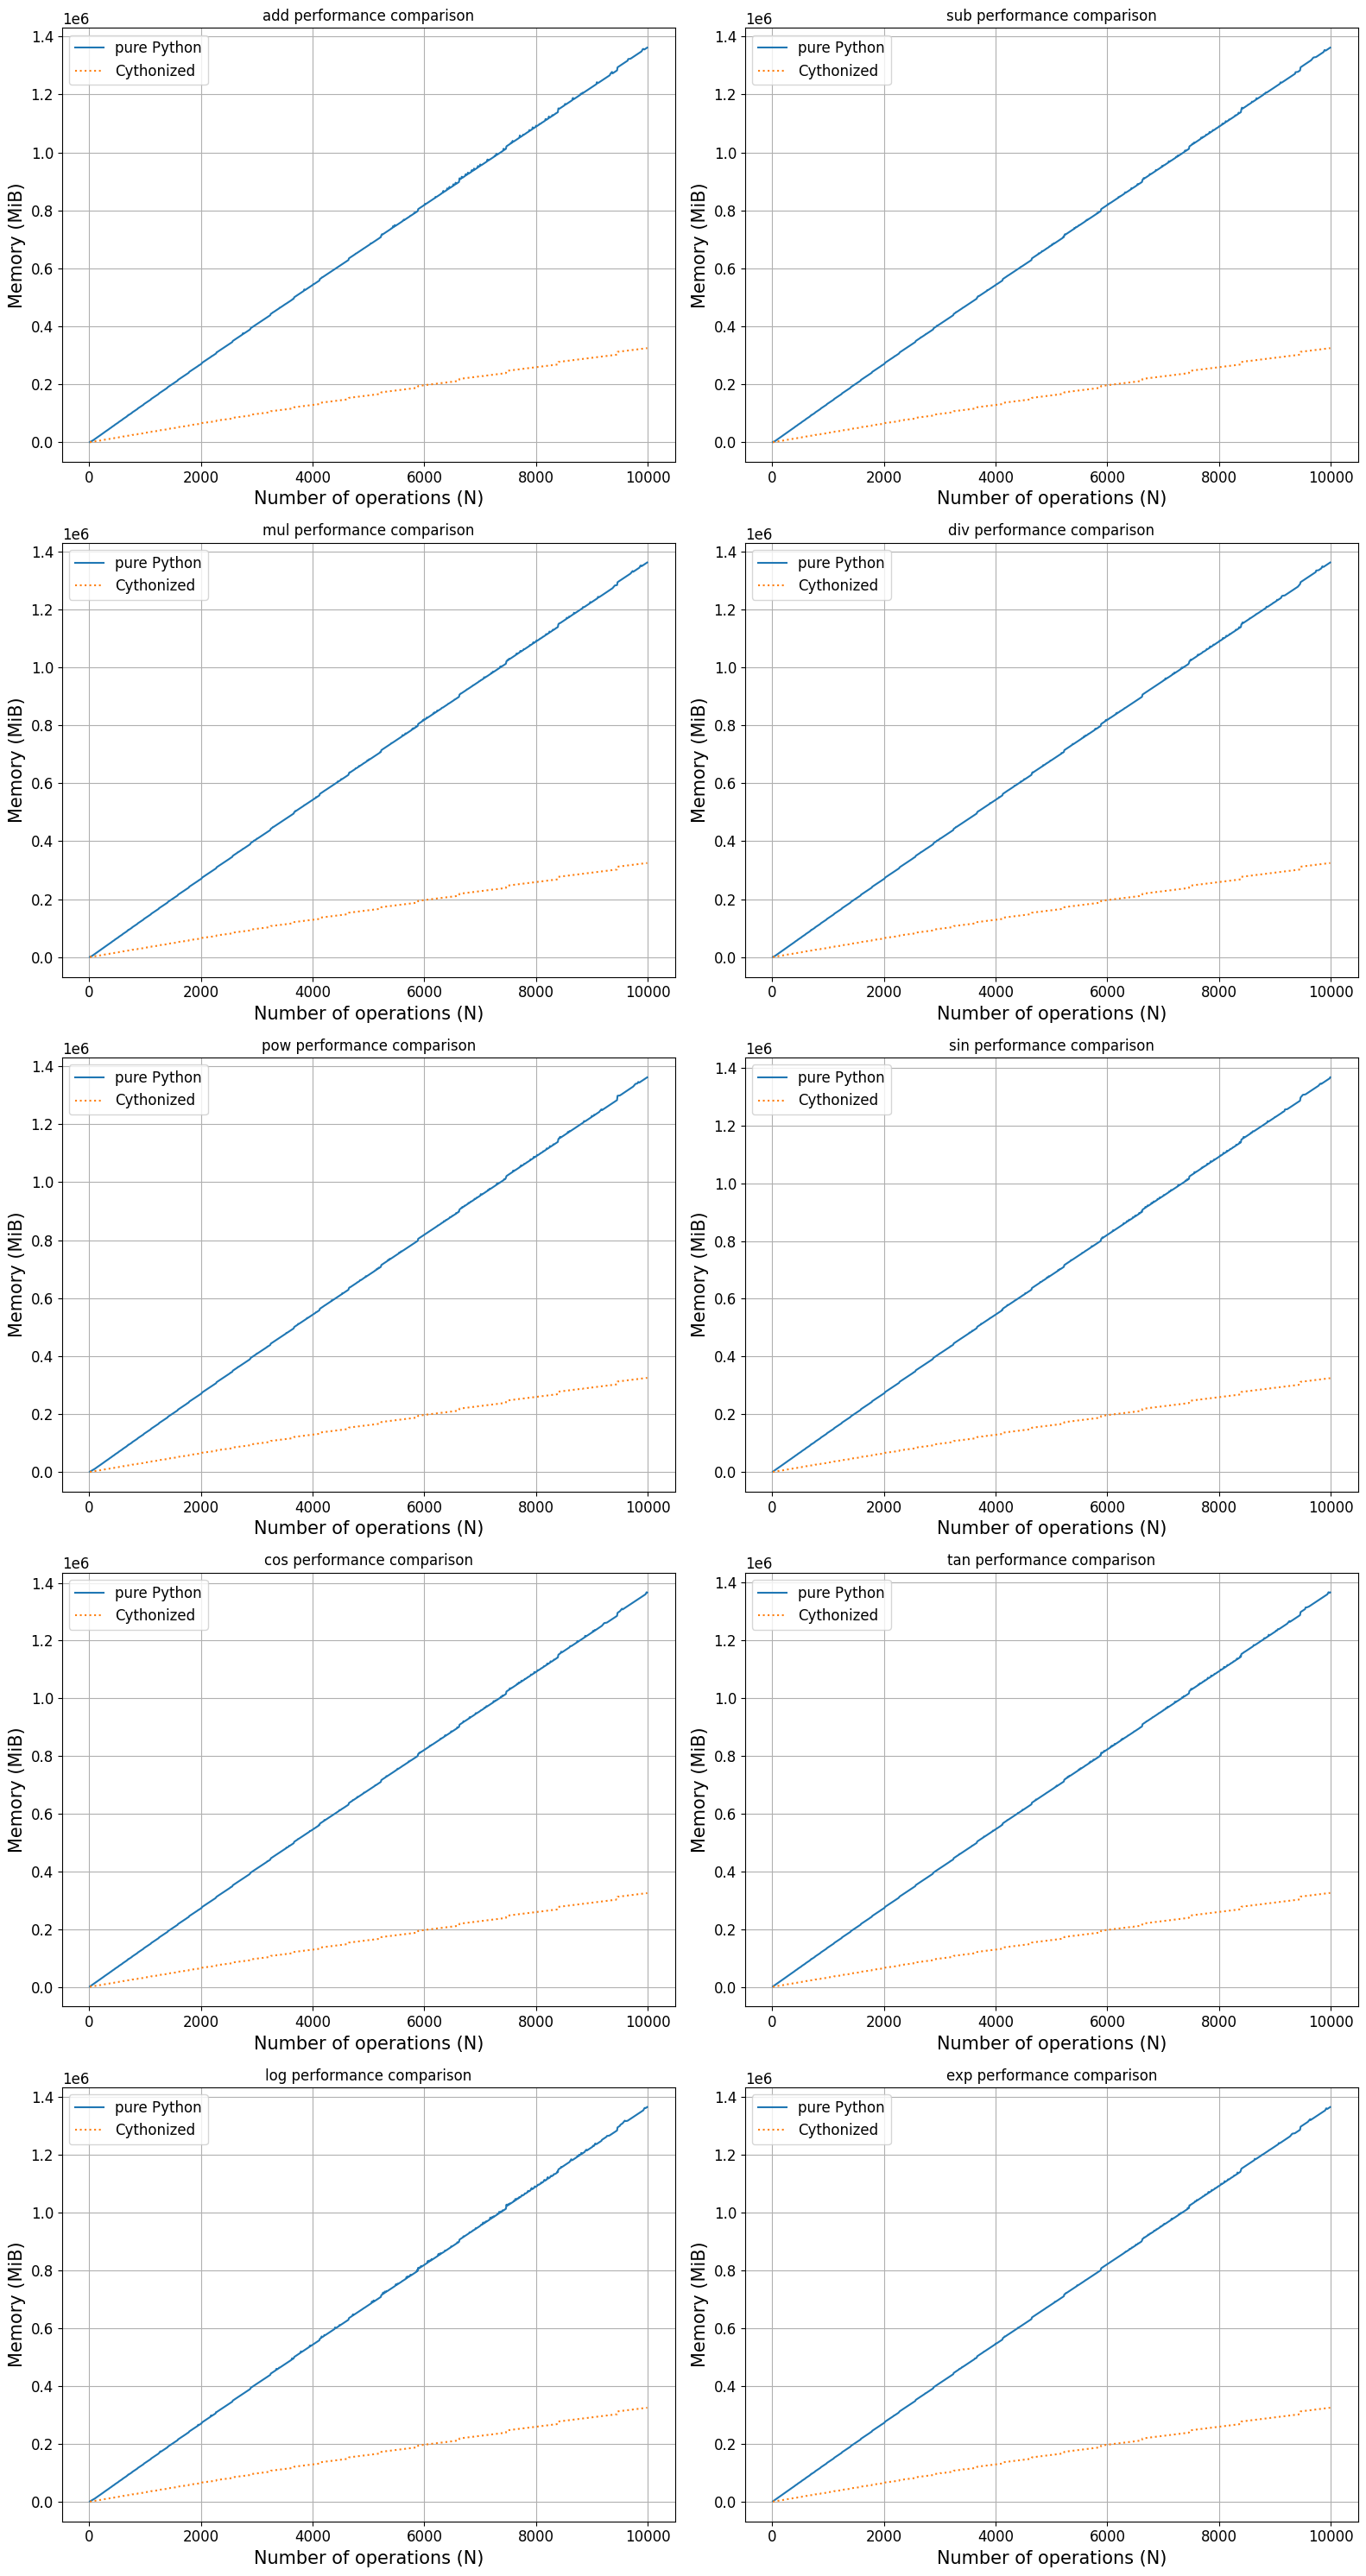

In [44]:
plt.figure(figsize=(16,30))
for i, operation in enumerate(operations):
    plt.subplot(5,2, i+1)
    plt.plot(N, memory[:, 0, i], label="pure Python")
    plt.plot(N, memory[:, 1, i], label="Cythonized", linestyle='dotted')
    plt.xlabel("Number of operations (N)")
    plt.ylabel("Memory (MiB)")
    plt.title(f"{operation} performance comparison")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()



In [45]:
N = np.arange(10, 10000, 10)


operations = ['add', 'sub', 'mul', 'div', 'pow', 'sin', 'cos', 'tan', 'log', 'exp']

times = np.zeros((len(N), 2, len(operations)))

for i, n in enumerate(N):
    x = df.Dual(np.random.rand(), np.random.rand())
    times[i, 0, 0] = timer(lambda:[x+x for _ in range(n)])
    times[i, 0, 1] = timer(lambda:[x-x for _ in range(n)])
    times[i, 0, 2] = timer(lambda:[x*x for _ in range(n)])
    times[i, 0, 3] = timer(lambda:[x/x for _ in range(n)])
    times[i, 0, 4] = timer(lambda:[x**x for _ in range(n)])
    times[i, 0, 5] = timer(lambda:[x.sin() for _ in range(n)])
    times[i, 0, 6] = timer(lambda:[x.cos() for _ in range(n)])
    times[i, 0, 7] = timer(lambda:[x.tan() for _ in range(n)])
    times[i, 0, 8] = timer(lambda:[x.log() for _ in range(n)])
    times[i, 0, 9] = timer(lambda:[x.exp() for _ in range(n)])

    x = dfx.Dual(np.random.rand(), np.random.rand())
    times[i, 1, 0] = timer(lambda:[x+x for _ in range(n)])
    times[i, 1, 1] = timer(lambda:[x-x for _ in range(n)])
    times[i, 1, 2] = timer(lambda:[x*x for _ in range(n)])
    times[i, 1, 3] = timer(lambda:[x/x for _ in range(n)])
    times[i, 1, 4] = timer(lambda:[x**x for _ in range(n)])
    times[i, 1, 5] = timer(lambda:[x.sin() for _ in range(n)])
    times[i, 1, 6] = timer(lambda:[x.cos() for _ in range(n)])
    times[i, 1, 7] = timer(lambda:[x.tan() for _ in range(n)])
    times[i, 1, 8] = timer(lambda:[x.log() for _ in range(n)])
    times[i, 1, 9] = timer(lambda:[x.exp() for _ in range(n)])


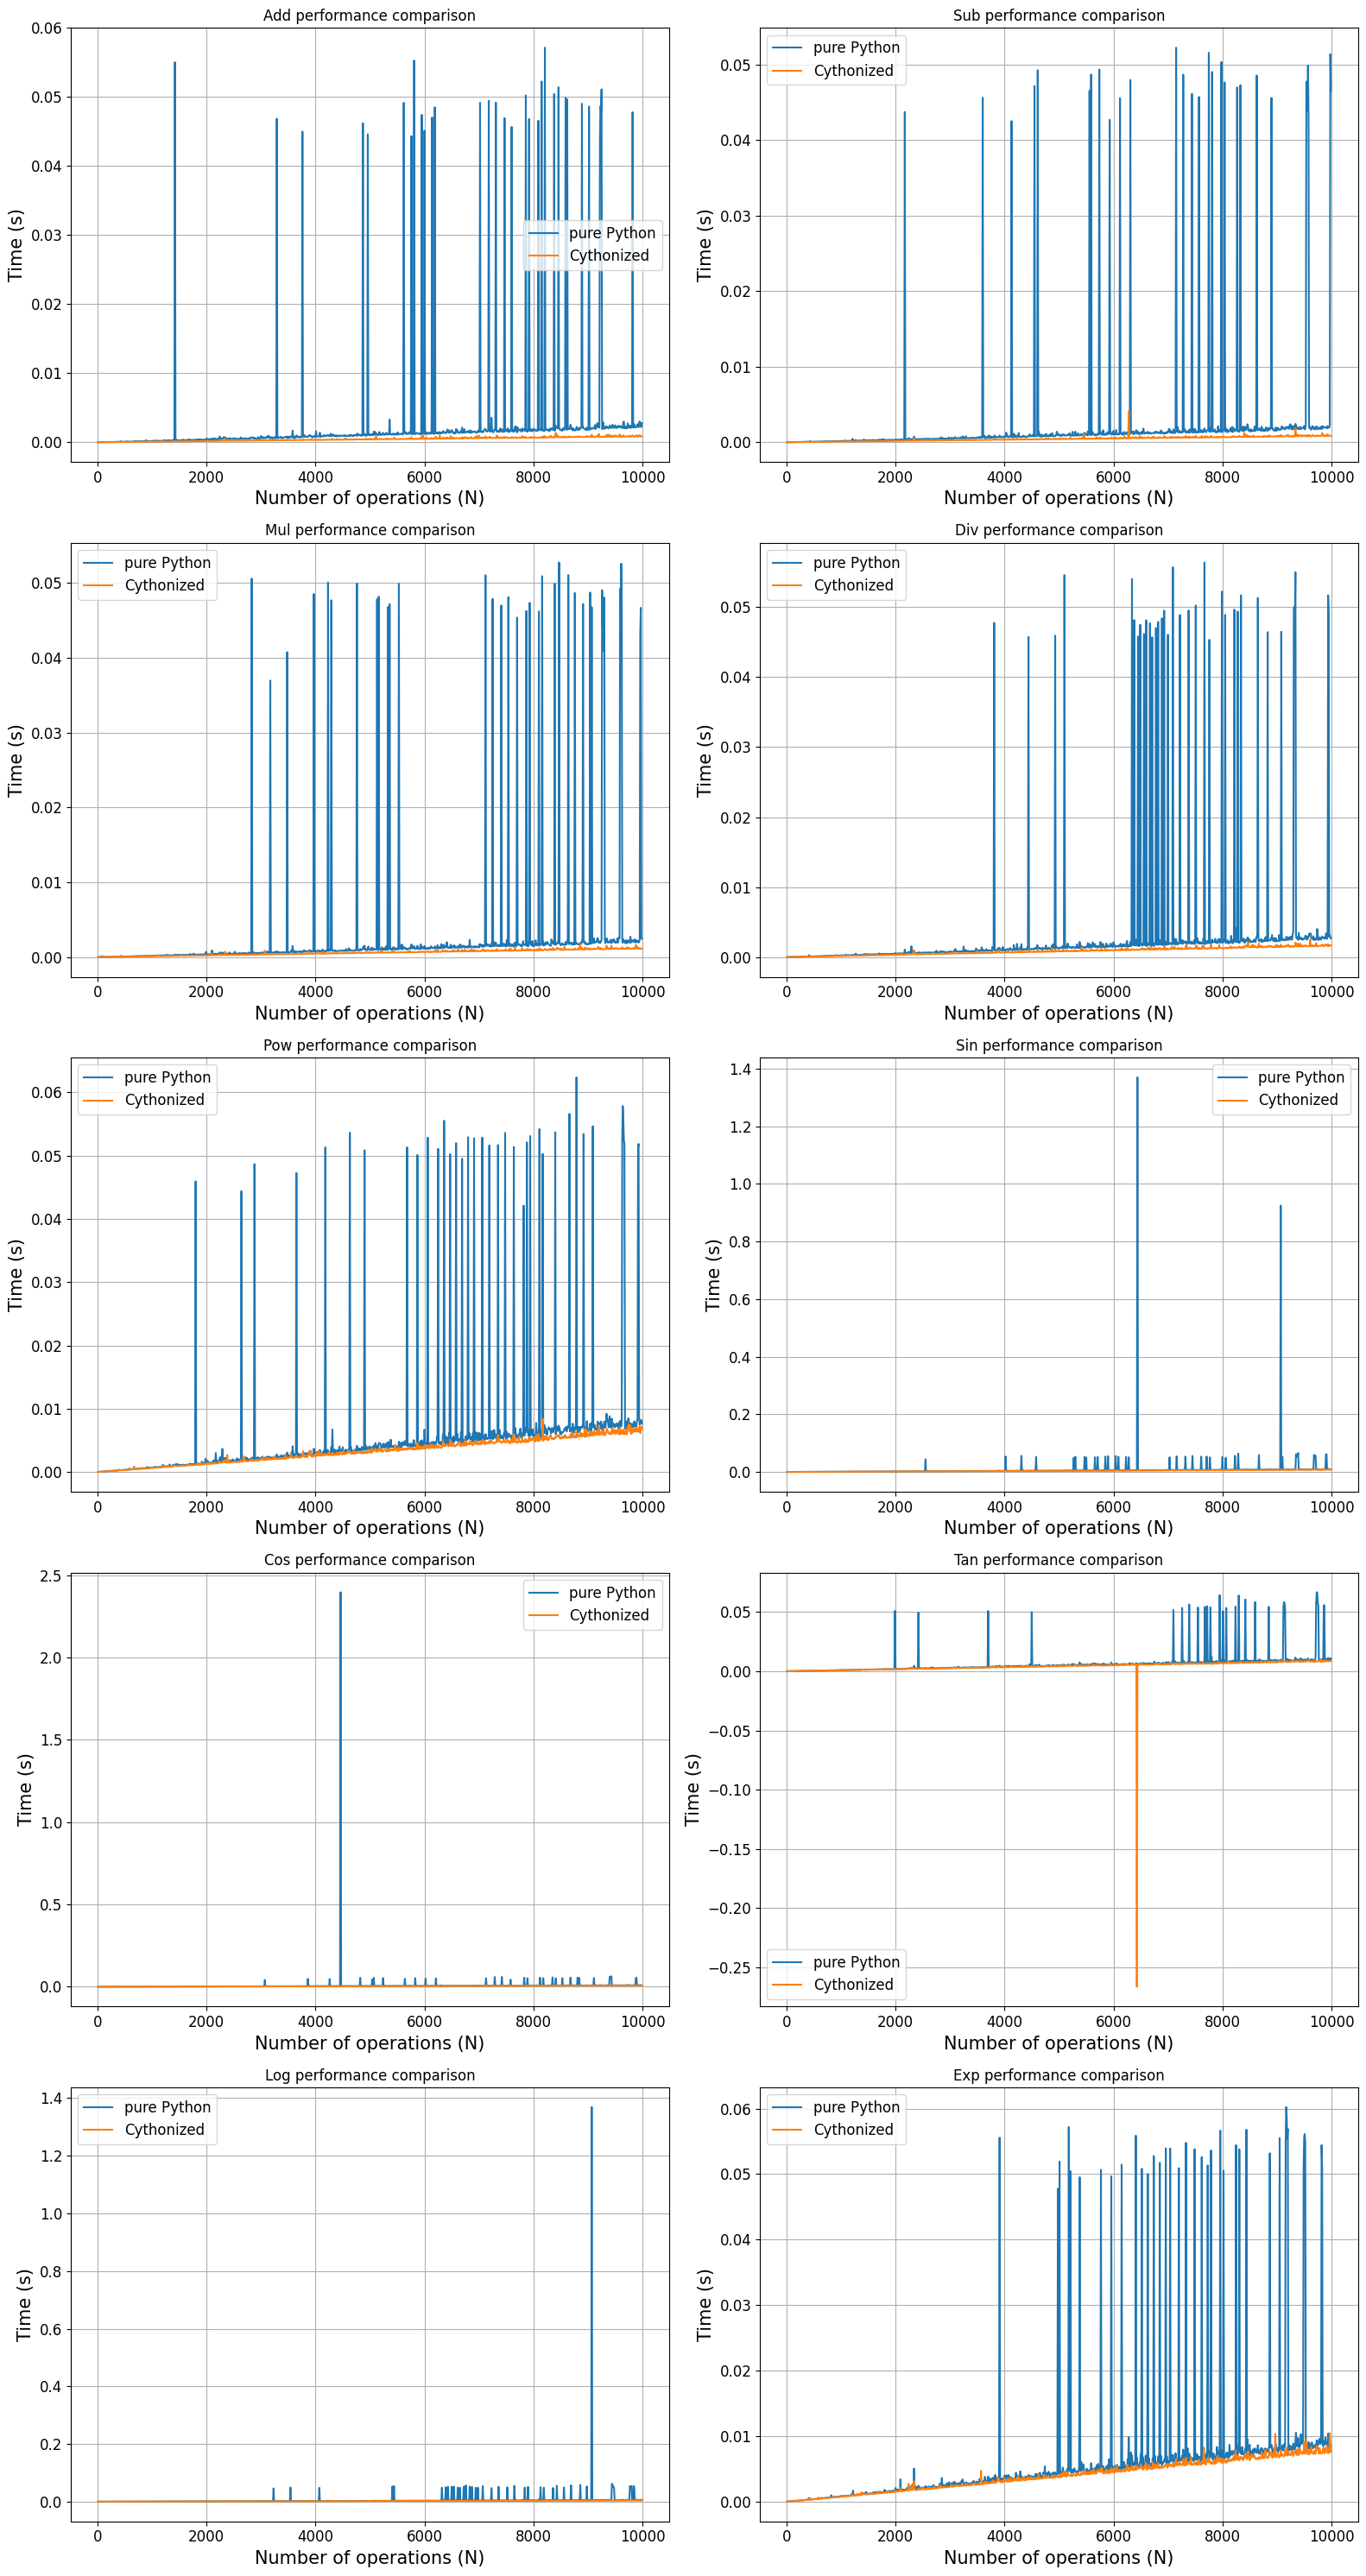

In [46]:
plt.figure(figsize=(16,30))
for i, operation in enumerate(operations):
    plt.subplot(5,2, i+1)
    plt.plot(N, times[:, 0, i], label="pure Python")
    plt.plot(N, times[:, 1, i], label="Cythonized")
    plt.xlabel("Number of operations (N)")
    plt.ylabel("Time (s)")
    plt.title(f"{operation.capitalize()} performance comparison")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()



In [1]:
import dual_autodiff as df
x = df.Dual(3, 1)
y = df.Dual(4, 2)
z = df.Dual(5, 3)
def f(x, y, z):
    return x.sin() + y*y + z.cos()
print(x.partial(f, x, y, z))
print(y.partial(f, x, y, z))
print(z.partial(f, x, y, z))

vars = [df.Dual(3, 1), df.Dual(4, 2), df.Dual(5, 3)]
print(vars.cos())

-0.9899924966004454
8.0
0.9589242746631385


AttributeError: 'list' object has no attribute 'cos'